## Loan problem

we would need to decide automatically wether someone is eligible for loan or not

# Import modules

In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

# Loading the dataset


In [200]:
df = pd.read_csv('Loan Prediction Dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [201]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preprocessing the dataset

In [203]:
#find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [204]:
#fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [205]:
#better way with a loop
num_att_missing = ['Loan_Amount_Term','LoanAmount','Credit_History']
for i in num_att_missing:
    df[i] = df[i].fillna(df[i].mean())

In [206]:
#fill the missing values for categorical terms - mode
cat_att_missing = ['Gender','Married','Dependents','Self_Employed']
for i in cat_att_missing:
    df[i] = df[i].fillna(df[i].mode()[0])

In [207]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

<Axes: xlabel='Married', ylabel='count'>

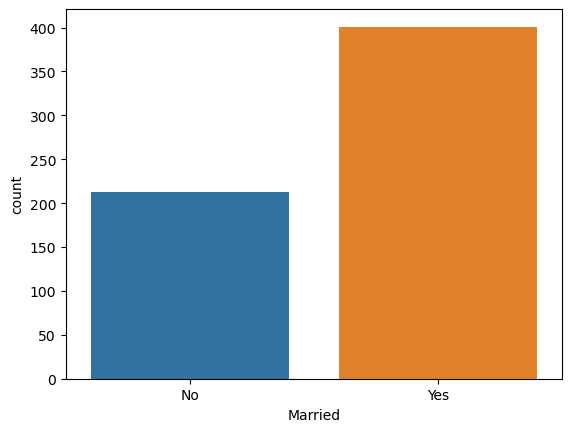

In [208]:
# categorical attributes
sns.countplot(data=df, x='Married')

<Axes: xlabel='Gender', ylabel='count'>

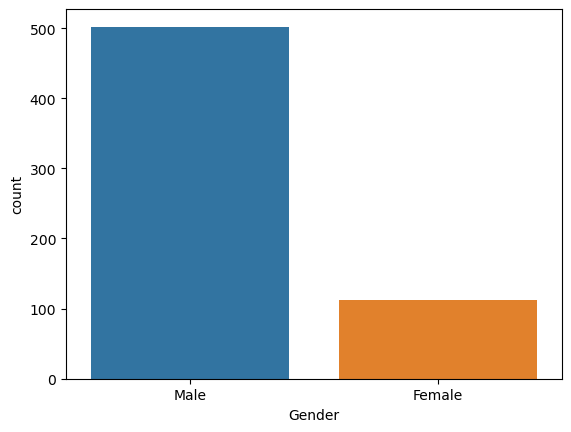

In [209]:
sns.countplot(data=df, x='Gender')

<Axes: xlabel='Dependents', ylabel='count'>

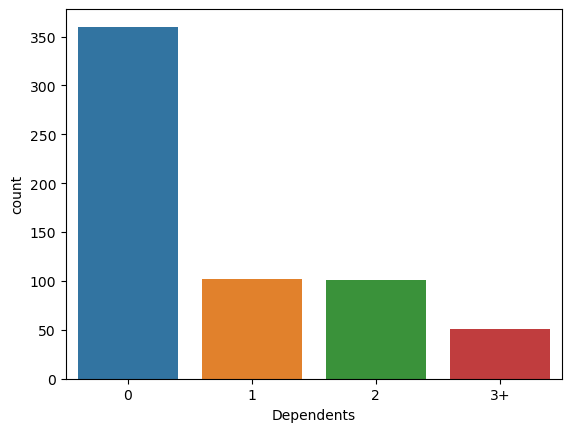

In [210]:
sns.countplot(data=df, x='Dependents')

<Axes: xlabel='Self_Employed', ylabel='count'>

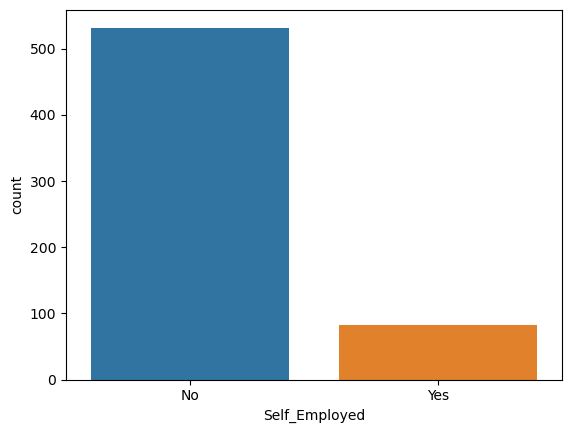

In [211]:
sns.countplot(data=df, x='Self_Employed')

<Axes: xlabel='Education', ylabel='count'>

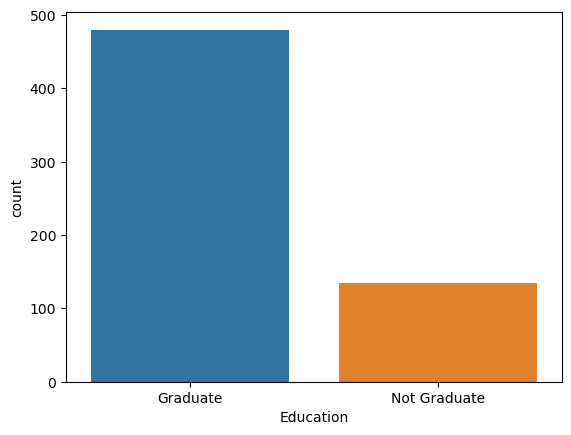

In [212]:
sns.countplot(data=df, x='Education')

<Axes: xlabel='Property_Area', ylabel='count'>

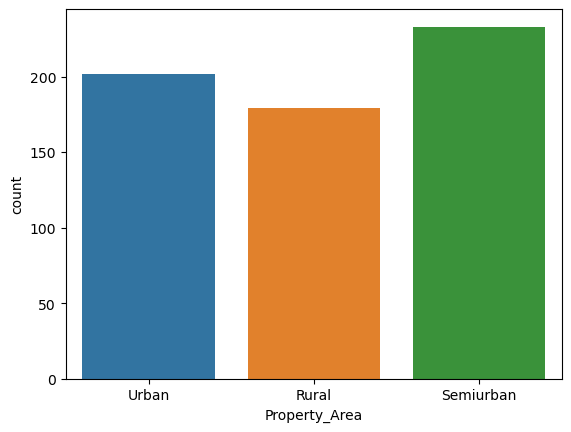

In [213]:
sns.countplot(data=df, x='Property_Area')

<Axes: xlabel='Loan_Status', ylabel='count'>

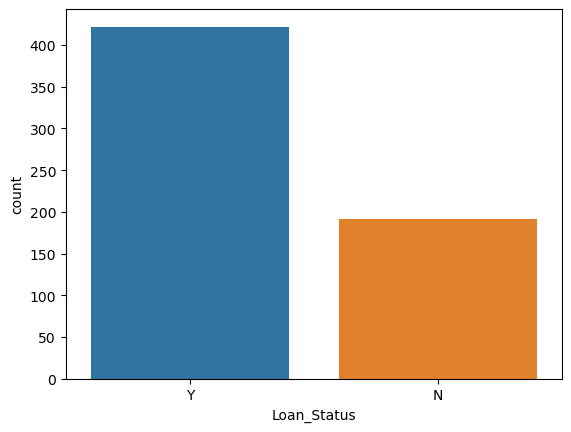

In [214]:
sns.countplot(data=df, x='Loan_Status')

# creation of new attribute

In [215]:
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [216]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


## Log transformation

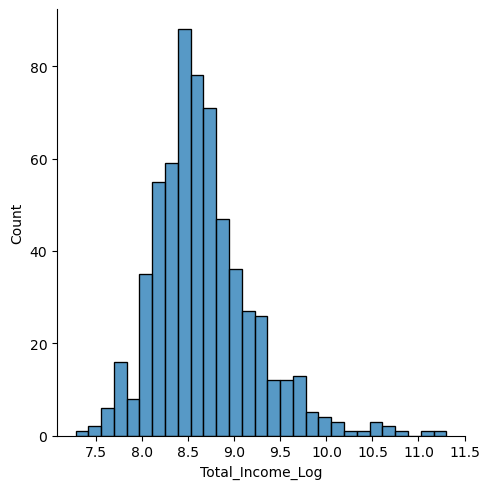

In [217]:
df['Total_Income_Log'] = np.log(df['Total_Income'])
sns.displot(df['Total_Income_Log'])

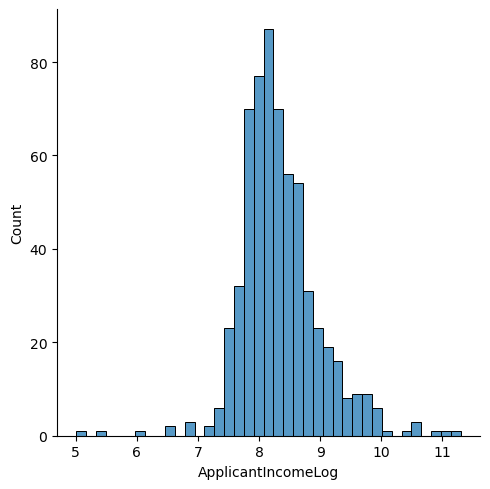

In [218]:
# Apply log transformation to the attribute to normalize it
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.displot(df['ApplicantIncomeLog'])

C:\Users\GSI Bedjaoui\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


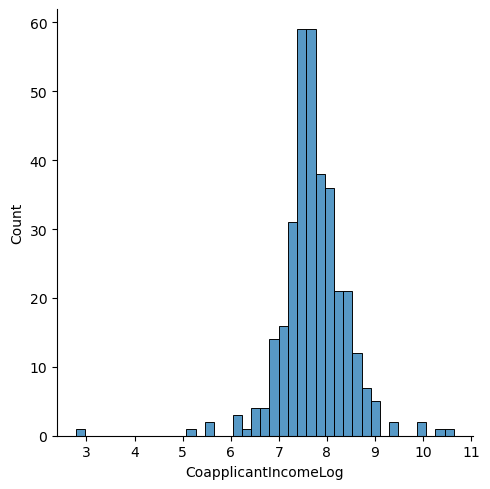

In [219]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
sns.displot(df['CoapplicantIncomeLog'])

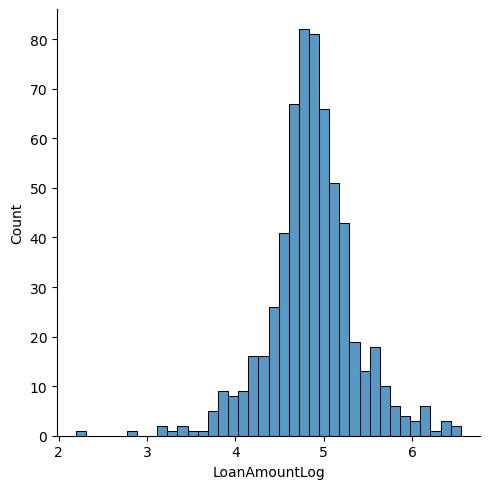

In [220]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.displot(df['LoanAmountLog'])

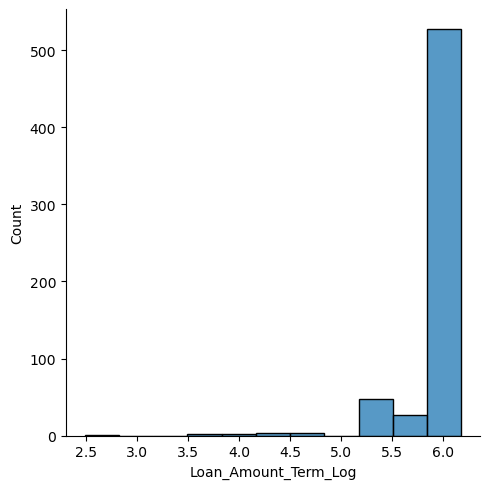

In [221]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.displot(df['Loan_Amount_Term_Log'])

### Coorelation Matrix

C:\Users\GSI Bedjaoui\AppData\Local\Temp\ipykernel_19980\2417058322.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

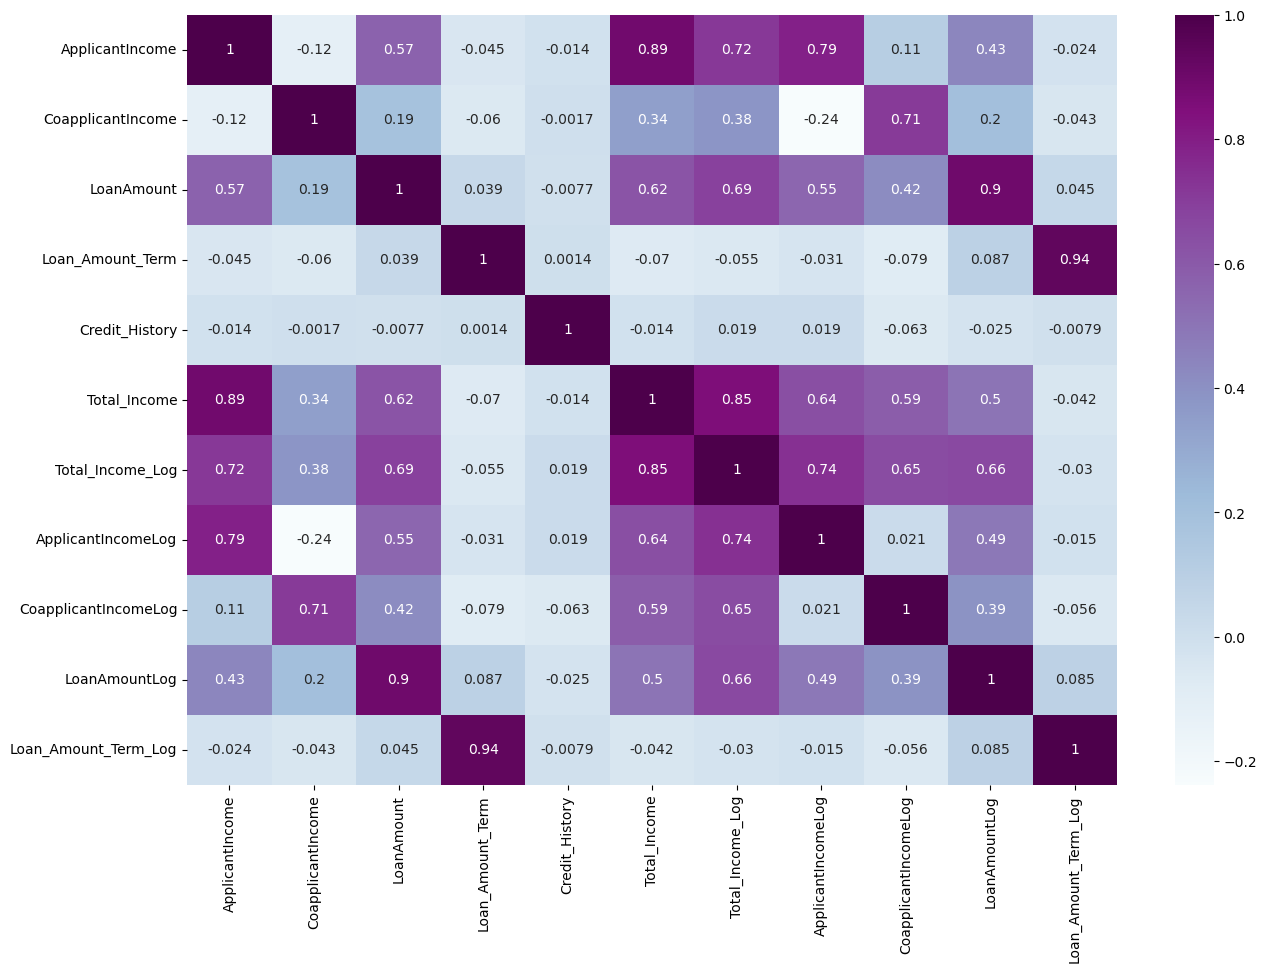

In [222]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='BuPu')

In [223]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_Log,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,8.674026,-inf,4.986426,5.886104
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.714568,8.430109,7.318540,4.852030,5.886104
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,8.006368,-inf,4.189655,5.886104
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,8.505323,7.856707,7.765569,4.787492,5.886104
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,8.699515,-inf,4.948760,5.886104


In [224]:
# Drop unecessary columns
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID','CoapplicantIncomeLog']
df = df.drop(columns = cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income_Log,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,8.674026,4.986426,5.886104
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.714568,8.430109,4.852030,5.886104
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,8.006368,4.189655,5.886104
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,8.505323,7.856707,4.787492,5.886104
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,8.699515,4.948760,5.886104


## Label Encoding

In [226]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [227]:
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income_Log,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log
0,1,0,0,0,0,1.0,2,1,8.674026,8.674026,4.986426,5.886104
1,1,1,1,0,0,1.0,0,0,8.714568,8.430109,4.852030,5.886104
2,1,1,0,0,1,1.0,2,1,8.006368,8.006368,4.189655,5.886104
3,1,1,0,1,0,1.0,2,1,8.505323,7.856707,4.787492,5.886104
4,1,0,0,0,0,1.0,2,1,8.699515,8.699515,4.948760,5.886104
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,1,7.972466,7.972466,4.262680,5.886104
610,1,1,3,0,0,1.0,0,1,8.320205,8.320205,3.688879,5.192957
611,1,1,1,0,0,1.0,2,1,9.025456,8.996157,5.533389,5.886104
612,1,1,2,0,0,1.0,2,1,8.933664,8.933664,5.231109,5.886104


## Train & Test set

In [228]:
# Specify input and output attributes
x = df.drop(columns =['Loan_Status'], axis=1)
y = df['Loan_Status']

In [229]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25 , random_state=42)

## Model training

In [230]:
# Classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25 , random_state=42)
    model.fit(x_train,y_train)
    print('Accuracy is : ', model.score(x_test, y_test)*100)
    # cross validation - it is used for better valisation of model
    # EG: cv-5 : train-4 and test-1
    score = cross_val_score(model,x ,y ,cv=5)
    print('Cross validation is : ', np.mean(score)*100)

In [231]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,x ,y)
# most of the time we give more importance to cross validation accuracy result

Accuracy is :  77.27272727272727
Cross validation is :  80.9462881514061


C:\Users\GSI Bedjaoui\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [232]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,x,y)

Accuracy is :  71.42857142857143
Cross validation is :  71.18086098893775


In [234]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()
classify(model,x,y)

Accuracy is :  79.22077922077922
Cross validation is :  78.66853258696523


In [235]:
model = ExtraTreesClassifier()
classify(model,x,y)

Accuracy is :  74.67532467532467
Cross validation is :  77.03985072637612


 ## Hyperparameter tunning

In [239]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7 , max_features=1)
classify(model,x,y)

Accuracy is :  76.62337662337663
Cross validation is :  80.78368652538984


## Confusion matrix

In [240]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [246]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[24, 30],
       [ 4, 96]], dtype=int64)

<Axes: >

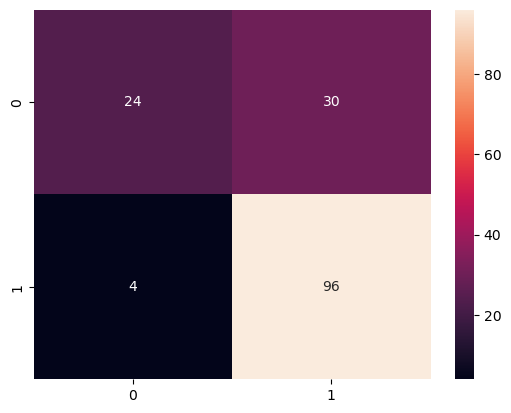

In [247]:
sns.heatmap(cm, annot=True)

In [ ]:
## 24 and 96 are well predicted , 30 and 4 are miss predicted